<a href="https://colab.research.google.com/github/DinhHuySang/Traffic-sign-classification/blob/master/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/Shared drives/Drive của Sáng/Traffic_sign_classification_from_scratch

/content/drive/Shared drives/Drive của Sáng/Traffic_sign_classification_from_scratch


In [4]:
ls


classification_model.ipynb  sanghandsome.h5  traffic-signs-data.zip  valid.p
README.md                   test.p           train.p


In [0]:
#link_data_set = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"


In [6]:
!pip install wget

In [0]:
import wget

In [0]:
#wget.download(link_data_set)

In [0]:
data = "./"

In [0]:
#!unzip -q traffic-signs-data.zip -d $data


In [0]:
train_link = data+"train.p"
valid_link = data+"valid.p"
test_link  = data+"test.p"


In [0]:
import pickle

In [0]:
with open(train_link, mode="rb") as tr:
  train = pickle.load(tr) 

In [0]:
with open(valid_link, mode="rb") as va:
  valid = pickle.load(va)

In [0]:
with open(test_link, mode="rb") as te:
  test = pickle.load(te)

In [0]:
trainX = train["features"]
trainy = train["labels"]

In [17]:
trainX.shape

(34799, 32, 32, 3)

In [18]:
trainy.shape

(34799,)

In [19]:
trainX[100]

array([[[197, 166, 123],
        [189, 154,  99],
        [198, 160, 102],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[170, 139,  97],
        [177, 144,  88],
        [185, 150,  94],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[165, 135,  96],
        [163, 132,  85],
        [169, 138,  88],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[119, 114,  79],
        [122, 115,  77],
        [131, 121,  86],
        ...,
        [ 84,  97, 105],
        [ 73,  85,  90],
        [ 71,  71,  73]],

       [[135, 116,  77],
        [131, 116,  73],
        [129, 117,  78],
        ...,
        [ 43,  53,  57],
        [ 39,  52,  56],
        [ 75,  77,  80]],

       [[154, 118,  80],
        [149, 124,  84],
        [136, 122,  84],
        ...,
        [ 41,  51,  41],
        [ 51,  68,  61],
        [ 79,  86,  82]]

In [0]:
import matplotlib.pyplot as plt


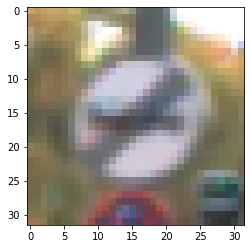

In [21]:
plt.imshow(trainX[100])

In [22]:
trainy[100]

41

In [0]:
classNames = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
    }


In [24]:
classNames[trainy[100]]

'End of no passing'

In [0]:
from sklearn.utils import shuffle

In [0]:
trainX, trainy = shuffle(trainX,trainy)

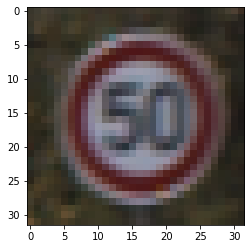

In [27]:
plt.imshow(trainX[100])

In [28]:
classNames[trainy[100]]

'Speed limit (50km/h)'

In [0]:
validX = valid["features"]
validy = valid["labels"]

In [0]:
testX = test["features"]
testy = test["labels"]

In [0]:
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb = LabelBinarizer()

In [0]:
trainy = lb.fit_transform(trainy)

In [0]:
validy = lb.fit_transform(validy)

In [36]:
valid["labels"][100]

31

In [37]:
validy[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import  SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
model = Sequential()

In [0]:
width = 32
height = 32
classes = 43

In [0]:
shape = (width,height,3)

In [0]:
model.add(Conv2D(32,(3,3), padding="same", input_shape=shape))

In [0]:
 model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Conv2D(32,(3,3), padding="same"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64,(3,3), padding="same"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Conv2D(64,(3,3), padding="same"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Conv2D(64,(3,3), padding="same"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Conv2D(64,(3,3), padding="same"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Conv2D(64,(3,3), padding="same"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(Dense(classes))

In [0]:
model.add(Activation("softmax"))

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [0]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [0]:
learning_rate = 0.01

In [0]:
epochs = 15
batch_size = 64

In [0]:
opt = SGD(learning_rate = learning_rate, momentum = 0.9)

In [0]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [77]:
print("start trainning")

start trainning


In [78]:
H = model.fit_generator(aug.flow(trainX,trainy,batch_size=batch_size), validation_data=(validX,validy),steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
543/543 [==============================] - 17s 32ms/step - loss: 2.1188 - accuracy: 0.3884 - val_loss: 1.3458 - val_accuracy: 0.5760
Epoch 2/15
543/543 [==============================] - 17s 32ms/step - loss: 0.6049 - accuracy: 0.8066 - val_loss: 0.6121 - val_accuracy: 0.8000
Epoch 3/15
543/543 [==============================] - 17s 31ms/step - loss: 0.2498 - accuracy: 0.9218 - val_loss: 0.4272 - val_accuracy: 0.8454
Epoch 4/15
543/543 [==============================] - 17s 31ms/step - loss: 0.1419 - accuracy: 0.9571 - val_loss: 0.3776 - val_accuracy: 0.8798
Epoch 5/15
543/543 [==============================] - 17s 31ms/step - loss: 0.1001 - accuracy: 0.9687 - val_loss: 0.2735 - val_accuracy: 0.9073
Epoch 6/15
543/543 [==============================] - 17s 31ms/step - loss: 0.0734 - accuracy: 0.9767 - val_loss: 0.3128 - val_accuracy: 0.8980
Epoch 7/15
543/543 [==============================] - 17s 32

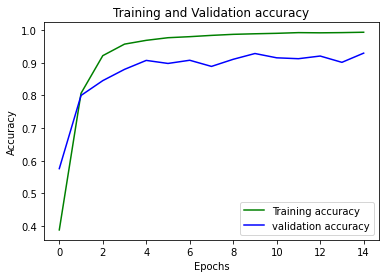

In [99]:
loss_train = H.history['accuracy']
loss_val = H.history['val_accuracy']
epochs = range(15)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

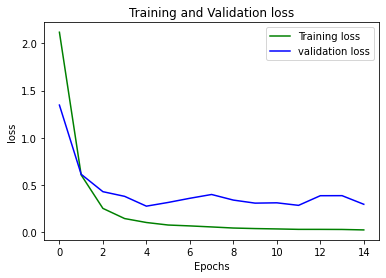

In [100]:
loss_tra = H.history['loss']
loss_va = H.history['val_loss']
epochs = range(15)
plt.plot(epochs, loss_tra, 'g', label='Training loss')
plt.plot(epochs, loss_va, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
model.save("sanghandsome.h5")

In [0]:
save_model = tf.keras.models.load_model("sanghandsome.h5")

In [0]:
reult = save_model.predict(testX[70:71])

In [83]:
reult

array([[7.69721578e-11, 6.34684579e-13, 1.48623904e-08, 1.10211264e-10,
        1.82926358e-15, 2.06875159e-11, 3.76859238e-11, 1.61841612e-12,
        3.63035814e-14, 5.07854609e-13, 2.90047653e-09, 9.99825776e-01,
        6.23360877e-11, 2.59826355e-10, 1.35296108e-10, 5.29405841e-15,
        1.86605831e-07, 1.03437237e-09, 4.79466966e-10, 5.83484052e-07,
        2.45769349e-10, 1.48210063e-04, 8.68957545e-11, 9.47866496e-08,
        4.42554854e-10, 4.80525806e-08, 4.15092904e-10, 2.43735540e-05,
        6.85928327e-08, 1.54805124e-09, 6.43598980e-07, 1.82389004e-09,
        3.36372558e-13, 2.29360281e-10, 4.34205137e-11, 4.36980938e-11,
        2.65028832e-10, 1.60144314e-10, 2.00006851e-11, 8.48141202e-09,
        1.22699699e-08, 1.65232186e-11, 4.05996747e-09]], dtype=float32)

In [0]:
 import numpy as np

In [0]:
final = np.argmax(reult)

In [0]:
final = classNames[final]

In [87]:
final

'Right-of-way at the next intersection'

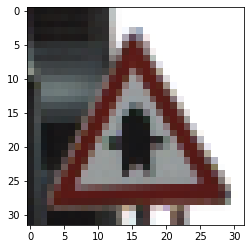

In [88]:
plt.imshow(test["features"][70])